# inflations impact on gas prices
## Objective

This notebook anaylyzes how inflation has affected the gas prices for Regular, Midgrade, and Premuim gas.

## Data Loading and Preprocessing
- **Data Sources**: We utilized three CSV files containing data on Regular, Midgrade, and Premium gasoline prices. Then, we implemented a CSV file containing the anual US inflation rate.
- **Preprocessing Steps**:
  - loading dta from csv files and removing any unnecessary and unused columns.
  - Assign meaningful column names based on the data structure.
  - Convert the 'Date' column to datetime format for better manipulation.
  - Add a column that takes the year from the 'Date' column to make its own feature called 'Year'.
  - Take the mean of each year to add to a list.

## Analysis Overview
- **Average Price Calculation**: 
  - Compute the average price for each year across all years for each type of gasoline.
- **Correlation Between Gas and Inflation**:
  - Computed the correlation between the average gas price yearly and the average inflation rate.
  - Computed the correlation between the difference from previous price adn the difference from previous inflation rate.
- **Visualization**:
  - Created a graph that showed average regular gas price annually.
  - Created a graph that shows the average inflation rate annually.
  - Created a graph that shows merged regular gas price annually and average inflation rate annually.
- **Prediction**:
  - Created a prediction model to predict whether gas price will go up or down based on inflation.


## Results
- **yearly Trends**:
  - **2022:** showed the highest prices across all types of gasoline, likely due to increased inflation and demand because of covid19.
  - **2009:** economic recession in 2008-2009.
- **Comparision of Regular Gas Price to Inflation Rate**:
  - The inflation Rate and average gas price per year are not very correlated to another just based on gas price vs inflation rate but are very positivly correlated when it comes to the difference from previous price and difference of previous inflation rate.
- **Prediction**:
  - Received a 77 percent accuracy of inflation predicting whether the gas price will go up or down.



## Conclusion
- Gas prices follow inflation pretty closely when looking at the graphs between the two. 

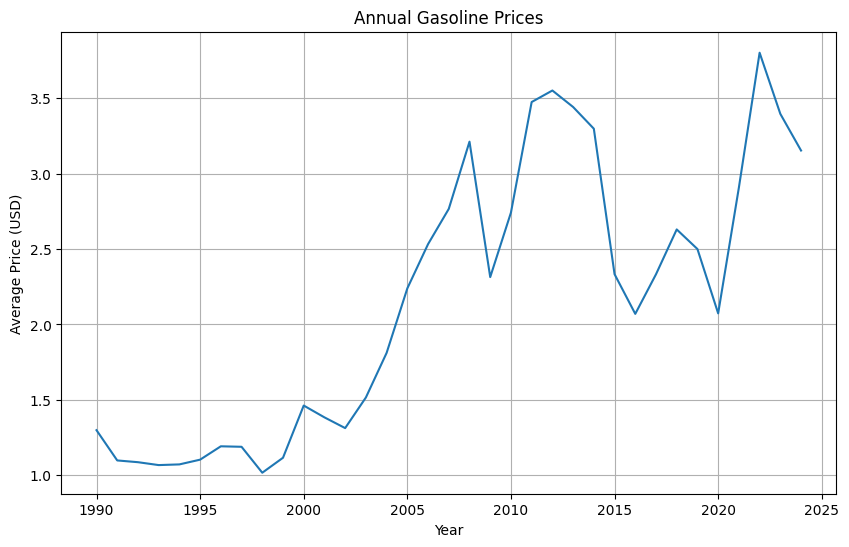

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

new_headers = ['Date', 'Gas Price']

def load_and_preprocess(file_path):
    df = pd.read_csv(file_path, header=2)
    df = df.iloc[:-1, :2]

    df.columns = new_headers
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    return df


df_regular = load_and_preprocess("Data/Data1_Regular_Conventional.csv")


average_regular_gas_price_yearly = df_regular.groupby('Year')['Gas Price'].mean()




plt.figure(figsize=(10, 6))


plt.title('Annual Gasoline Prices')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.grid(True)

plt.plot(average_regular_gas_price_yearly, label="regular")


plt.show()


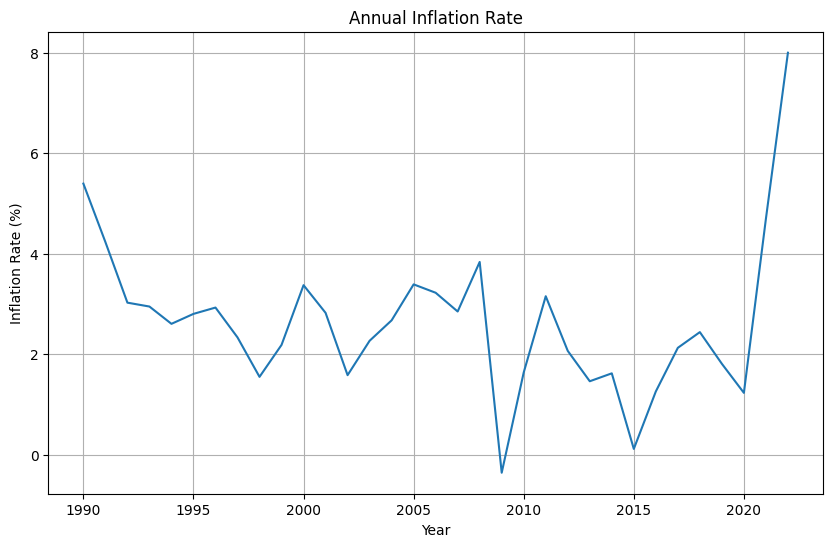

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

new_headers = ['Date', 'Inflation Rate']

df_inflation = pd.read_csv("Data/Inflation_rate_in_US_yearly.csv")
df_inflation.columns = new_headers
df_inflation['Date'] = pd.to_datetime(df_inflation['Date'])
df_inflation['Year'] = df_inflation['Date'].dt.year
df_inflation = df_inflation[df_inflation['Year'] >= 1990]


plt.figure(figsize=(10, 6))


plt.title('Annual Inflation Rate')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)

plt.plot(df_inflation["Year"], df_inflation["Inflation Rate"], )


plt.show()



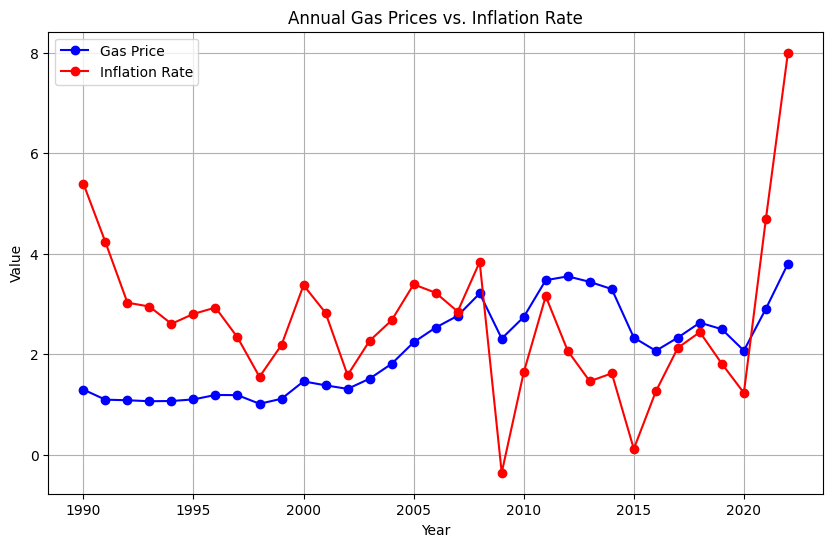

In [4]:
merged_df = pd.merge(average_regular_gas_price_yearly, df_inflation, on='Year', how='inner')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Year'], merged_df['Gas Price'], label='Gas Price', color='blue', marker='o')
plt.plot(merged_df['Year'], merged_df['Inflation Rate'], label='Inflation Rate', color='red', marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Annual Gas Prices vs. Inflation Rate')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [5]:
correlation_coefficient = merged_df['Gas Price'].corr(merged_df['Inflation Rate'])

print("Correlation Coefficient between Gas Prices and Inflation Rates:", correlation_coefficient)

# Calculate difference for gas prices and inflation rates
merged_df['Gas Price Difference'] = merged_df['Gas Price'].diff()
merged_df['Inflation Rate Difference'] = merged_df['Inflation Rate'].diff()

correlation_coefficient = merged_df['Gas Price Difference'].corr(merged_df['Inflation Rate Difference'])

print("Correlation Coefficient between Gas Prices and Inflation Rates:", correlation_coefficient)

merged_df

Correlation Coefficient between Gas Prices and Inflation Rates: 0.11097959859966378
Correlation Coefficient between Gas Prices and Inflation Rates: 0.8366046620956924


,Year,Gas Price,Date,Inflation Rate,Gas Price Difference,Inflation Rate Difference
0,1990,1.298875,1990-01-01,5.397956,NaN,NaN
1,1991,1.098120,1991-01-01,4.234964,-0.200755,-1.162992
2,1992,1.086500,1992-01-01,3.028820,-0.011620,-1.206144
3,1993,1.067308,1993-01-01,2.951657,-0.019192,-0.077163
4,1994,1.071846,1994-01-01,2.607442,0.004538,-0.344215
5,1995,1.103308,1995-01-01,2.805420,0.031462,0.197978
6,1996,1.191925,1996-01-01,2.931204,0.088617,0.125785
7,1997,1.188692,1997-01-01,2.337690,-0.003232,-0.593514
8,1998,1.016654,1998-01-01,1.552279,-0.172038,-0.785411
9,1999,1.115981,1999-01-01,2.188027,0.099327,0.635748


In [6]:
# Created new columns that show difference of previous row
merged_df['Price Change'] = merged_df['Gas Price'].diff()
merged_df['Inflation Change'] = merged_df['Inflation Rate'].diff()

# Define a function to label price changes as 'Up', 'Down', or 'No Change'
def label_change(change):
    if change > 0:
        return 'Up'
    elif change < 0:
        return 'Down'
    else:
        return 'No Change'

# Apply the function to create the 'Change Direction' column
merged_df['Change Direction'] = merged_df['Price Change'].apply(label_change)
merged_df['Inflation Direction'] = merged_df['Inflation Change'].apply(label_change)


# Display the DataFrame with the new columns
merged_df

,Year,Gas Price,Date,Inflation Rate,Gas Price Difference,Inflation Rate Difference,Price Change,Inflation Change,Change Direction,Inflation Direction
0,1990,1.298875,1990-01-01,5.397956,NaN,NaN,NaN,NaN,No Change,No Change
1,1991,1.098120,1991-01-01,4.234964,-0.200755,-1.162992,-0.200755,-1.162992,Down,Down
2,1992,1.086500,1992-01-01,3.028820,-0.011620,-1.206144,-0.011620,-1.206144,Down,Down
3,1993,1.067308,1993-01-01,2.951657,-0.019192,-0.077163,-0.019192,-0.077163,Down,Down
4,1994,1.071846,1994-01-01,2.607442,0.004538,-0.344215,0.004538,-0.344215,Up,Down
5,1995,1.103308,1995-01-01,2.805420,0.031462,0.197978,0.031462,0.197978,Up,Up
6,1996,1.191925,1996-01-01,2.931204,0.088617,0.125785,0.088617,0.125785,Up,Up
7,1997,1.188692,1997-01-01,2.337690,-0.003232,-0.593514,-0.003232,-0.593514,Down,Down
8,1998,1.016654,1998-01-01,1.552279,-0.172038,-0.785411,-0.172038,-0.785411,Down,Down
9,1999,1.115981,1999-01-01,2.188027,0.099327,0.635748,0.099327,0.635748,Up,Up


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame containing gas prices, including the 'Change Direction' and 'Inflation' columns

# Define features (inflation) and target variable (change direction)
X = merged_df[['Inflation Change']]
Y = merged_df['Change Direction']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Initialize and train the model (Random Forest Classifier)
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance (accuracy)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8571428571428571


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Assuming merged_df is the DataFrame containing merged gas prices and inflation data

# Train-test split
X = merged_df[['Inflation Rate']]  # Features (inflation)
y = merged_df['Gas Price']  # Target variable (gas price)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

# Model training
model = LinearRegression()
model.fit(X_train, Y_train)

# Model evaluation
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)
train_rmse = mean_squared_error(Y_train, train_preds, squared=False)
test_rmse = mean_squared_error(Y_test, test_preds, squared=False)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 0.787382062811092
Test RMSE: 1.2546900564617722


c:\Users\jobea\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\jobea\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
